### Preprocesado de datos

In [49]:
import pandas as pd

# Datos obtenidos de https://databank.worldbank.org/reports.aspx?source=world-development-indicators#
with open ("datos.csv", "r") as f:
    lineas = f.read().splitlines()
    rangoDeLineas = lineas[:85]

with open("preprocesado.csv", "w") as f:
    for linea in rangoDeLineas:
        f.write(linea + "\n")

#Leer datos
df = pd.read_csv("preprocesado.csv", sep =",")
df = df.drop(columns=["Series Code", "Country Code"], errors="ignore")
#Limpieza de datos

df.columns = ['País', 'Indicador', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df

,País,Indicador,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Panama,Access to electricity (% of population),86.9,88.6,89.300000,89.1,90.800000,91.6,92.4,93.7,93.8,93.9,95.3,95.3,95
1,Panama,Adjusted net national income per capita (curre...,7015.42519401087,8352.88381575184,9470.203419,10522.9611933459,11017.875258,11982.0392200809,12440.2690508819,13242.292985116,13217.7100307791,13342.468707283,10887.5910897658,11830.9871827426,..
2,Panama,Current health expenditure per capita (current...,608.2467041,665.84649658,725.863770,806.58551025,920.076599,982.79394531,1057.40661621,1127.68896484,1228.07336426,1340.13781738,1358.09069824,1415.24499512,..
3,Panama,"Employment to population ratio, 15+, total (%)...",59.391,59.077,60.790000,61.487,60.933000,60.898,60.851,60.06,61.463,61.817,51.296,53.504,57.727
4,Panama,GDP per capita (current US$),8124.55830734871,9403.43990821634,10767.293179,11932.2862205866,12837.247958,13669.5594424097,14382.2323819969,15185.9724813803,16156.0742859681,16472.8317470488,13293.3331951688,15491.2898013383,17357.6286293985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Belize,"Labor force, total",128753,133836,138977.000000,144234,151065.000000,156821,162580,166748,170728,174493,172620,177472,185068
80,Belize,"Life expectancy at birth, total (years)",72.272,72.651,73.245000,73.666,73.311000,73.187,73.399,73.562,73.703,73.931,72.854,70.47,70.962
81,Belize,Net migration,1644,1583,1529.000000,1504,1452.000000,1363,1283,1222,1185,1164,0,577,600
82,Belize,People using at least basic sanitation service...,85.6277083290934,85.9422379234594,86.257854,86.5747585957408,86.893045,87.2129807113852,87.534777016108,87.8585217818837,88.184416079473,88.1985036524971,88.2142766873075,88.23173186587,88.2510779331487


In [50]:
''' TAREAS PARA EL PROYECTO:
Un DataFrame por Indicador:
Bryan
	'Access to electricity (% of population)',
    'Adjusted net national income per capita (current US$)'
Jaime
	'Current health expenditure per capita (current US$)',
	'Employment to population ratio, 15+, total (%) (national estimate)',
Nery
	'GDP per capita (current US$)',
	'Industry (including construction), value added (% of GDP)',
Maria Jose
	'Labor force with advanced education (% of total working-age population with advanced education)',
	'Labor force, total', 
	'Life expectancy at birth, total (years)',
Karen
	'Net migration',
	'People using at least basic sanitation services (% of population)',
	'Population density (people per sq. km of land area)'

2. HACER LOS SIGUIENTES GRAFICOS PARA CADA INDICADOR:
1. Barras
2. 
'''
cantidadIndicadores = len(df['Indicador'].unique()) # cantidad de indicadores
cantidadIndicadores, df['Indicador'].unique() # imprime los indicadores

(12,
 array(['Access to electricity (% of population)',
        'Adjusted net national income per capita (current US$)',
        'Current health expenditure per capita (current US$)',
        'Employment to population ratio, 15+, total (%) (national estimate)',
        'GDP per capita (current US$)',
        'Industry (including construction), value added (% of GDP)',
        'Labor force with advanced education (% of total working-age population with advanced education)',
        'Labor force, total', 'Life expectancy at birth, total (years)',
        'Net migration',
        'People using at least basic sanitation services (% of population)',
        'Population density (people per sq. km of land area)'],
       dtype=object))

### Bryan
- 'Access to electricity (% of population)'

In [51]:
# seleccione las filas que contienen el indicador "Access to electricity (% of population" 
dfAccessElectricity = df[df['Indicador'].str.contains('Access to electricity (% of population)', na=False, regex=False)] 
# eliminar la columna indicador
dfAccessElectricity  = dfAccessElectricity.drop(columns=['Indicador'])
# elegimos la columna " País" como index y eliminamos la columna "País"
dfAccessElectricity .set_index('País', inplace=True)
# mostramos los datos 
dfAccessElectricity 

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,86.9,88.6,89.3,89.1,90.8,91.6,92.4,93.7,93.8,93.9,95.3,95.3,95
Costa Rica,99,99.2,99.5,99.6,99.4,99.4,99.5,99.6,99.7,99.7,99.9,100,100
El Salvador,91.6,92.6,93.7,95,95.1,95.4,96,96.8,97,97.4,99.7,97.9,100
Guatemala,84.3,84,86.8,88.1,85.5,90.5,91.8,93.3,94.2,95.4,96.6,97.9,99.1
Honduras,81,82.2,83.6,87.2,88.7,90,91.6,86.5,91.6,91.1,93.1,94.1,94.4
Nicaragua,80.1,81.2,81.3,81.9,81.9,83.2,83.9,84.6,85.2,85.7,86,86.3,86.5
Belize,89.9,91.7,90.9,91.1,91.5,91.8,93.3,94.2,91.7,92.7,96.8,97.7,98.6


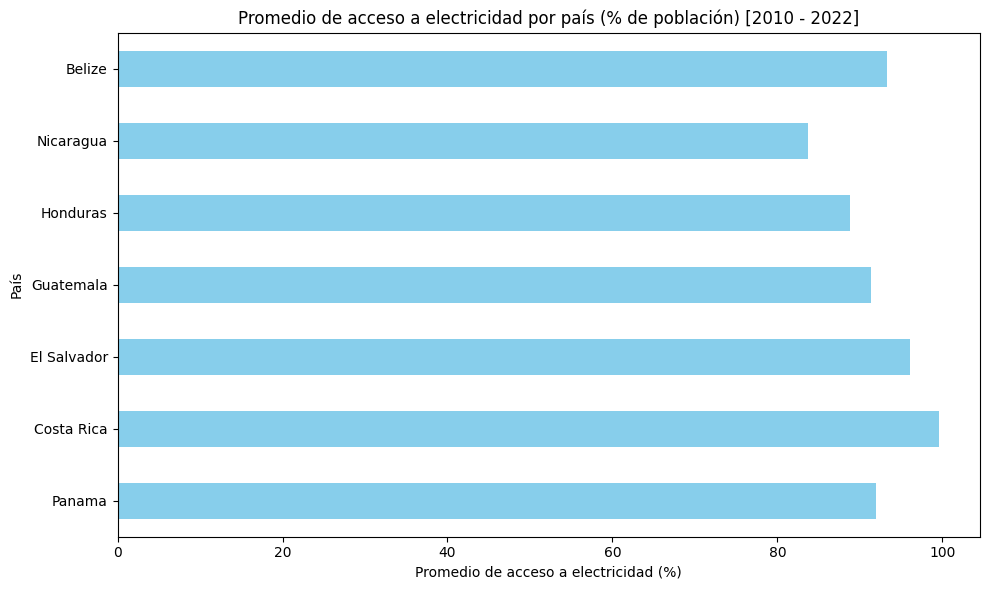

In [52]:
import matplotlib.pyplot as plt

# Convertir todas las columnas (excepto el índice) a valores numéricos
dfAccessElectricity = dfAccessElectricity.apply(pd.to_numeric, errors='coerce')

# Calcular la media de cada fila (promedio por país)
dfAccessElectricity['Media'] = dfAccessElectricity.mean(axis=1)

# Crear el gráfico de barras horizontales para la media de cada país
dfAccessElectricity['Media'].plot(kind='barh', color='skyblue', figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Promedio de acceso a electricidad (%)')
plt.ylabel('País')
plt.title('Promedio de acceso a electricidad por país (% de población) [2010 - 2022]')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Adjusted net national income per capita (current US$)

In [53]:
# seleccione las filas que contienen el indicador "Adjusted net national income per capita (current US$)" 
dfPerCapita = df[df['Indicador'].str.contains('Adjusted net national income per capita (current US$)', na=False, regex=False)] 
# eliminar la columna indicador
dfPerCapita  = dfPerCapita.drop(columns=['Indicador'])
# elegimos la columna " País" como index y eliminamos la columna "País"
dfPerCapita .set_index('País', inplace=True)
# Reemplazar ".." con NaN para tratar valores faltantes como vacíos
dfPerCapita.replace("..", pd.NA, inplace=True)
# Eliminar columnas completamente vacías (todas las filas NaN)
dfPerCapita = dfPerCapita.dropna(axis=1, how='all')
# mostramos los datos 
dfPerCapita 

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,
Panama,7015.42519401087,8352.88381575184,9470.203419,10522.9611933459,11017.875258,11982.0392200809,12440.2690508819,13242.292985116,13217.7100307791,13342.468707283,10887.5910897658,11830.9871827426
Costa Rica,7417.77752146118,8301.60488959396,9109.071521,9678.35110519984,9736.609781,10446.7590407173,10786.8880233463,10833.4465199305,11041.9189987741,11300.9351944679,10790.5425392728,10968.7313742907
El Salvador,2646.67782274323,2931.95467368242,3010.034175,3028.66630484378,3088.366937,3181.57824187685,3240.60449508984,3301.29448742661,3395.90889620162,3535.0636037592,3178.73711096268,3676.34957226722
Guatemala,2417.94636048594,2722.66306177561,2871.734302,3004.24382352275,3212.699028,3439.84711979065,3560.90388718974,3791.60178840997,3845.29922607009,4006.90710748626,3977.51225969779,4308.91309993237
Honduras,1636.52385383733,1827.70996762527,1843.755074,1805.12398632364,1869.974788,1984.10464937445,2001.89679001679,2127.09307936898,2135.61998376748,2198.91045137401,2096.53419960811,2407.05060702826
Nicaragua,1319.96046969527,1438.65318435535,1510.682878,1539.99866408667,1675.731940,1774.07898220904,1800.67080755003,1838.88525572961,1717.29591765436,1666.97671682866,1582.25170903244,1694.98665831936
Belize,3887.56178973155,4021.23739523251,4175.999757,4459.98713877892,4621.495523,4912.61272933351,4869.34818869705,4772.05540508598,4660.24262821026,4787.39752957686,4181.93157944865,4823.4817941724


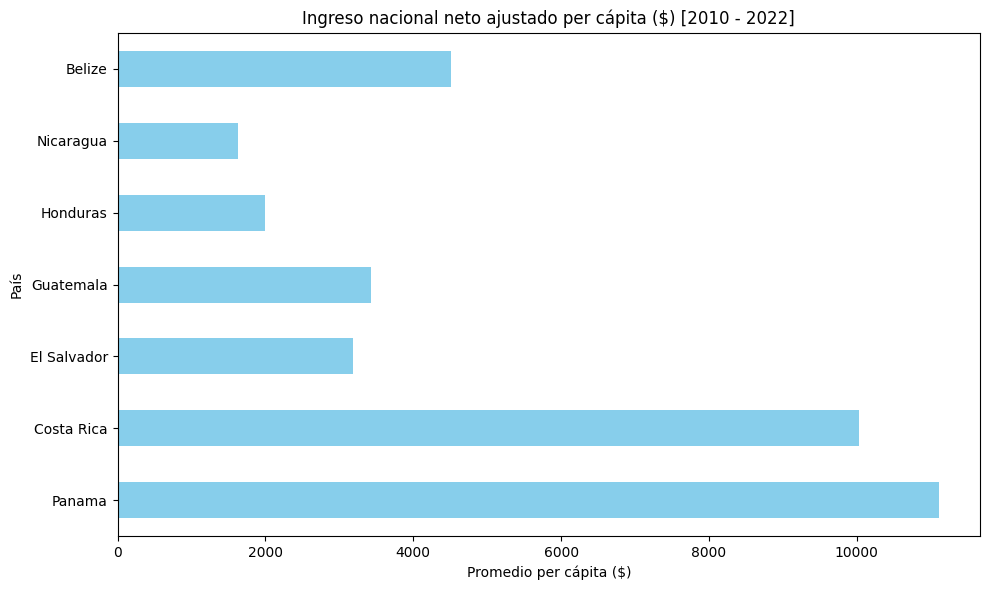

In [54]:
# Convertir todas las columnas (excepto el índice) a valores numéricos
dfPerCapita = dfPerCapita.apply(pd.to_numeric, errors='coerce')

# Calcular la media de cada fila (promedio por país)
dfPerCapita['Media'] = dfPerCapita.mean(axis=1)

# Crear el gráfico de barras horizontales para la media de cada país
dfPerCapita['Media'].plot(kind='barh', color='skyblue', figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Promedio per cápita ($)')
plt.ylabel('País')
plt.title('Ingreso nacional neto ajustado per cápita ($) [2010 - 2022]')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Jaime

### Nery

-Indicador: GDP per capita (current US$)

Representa la cantidad de dinero que le correspondería a cada habitante del país si se repartiera a todos por igual el PIB generado en un año

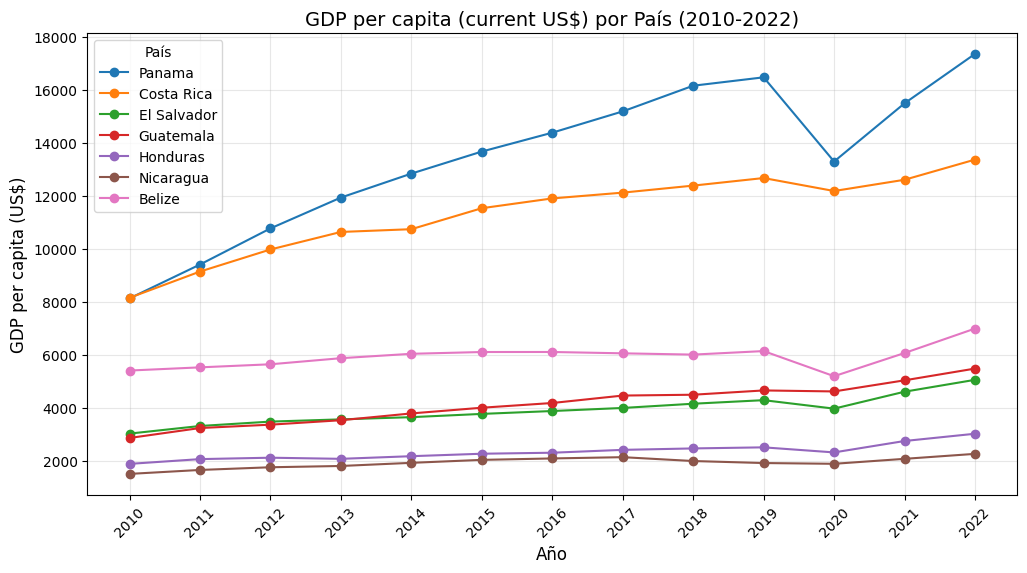

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar por un indicador específico
dfGPD = df[df['Indicador'] == "GDP per capita (current US$)"]

# Convertir columnas a numérico y calcular la media por país
dfGPD.iloc[:, 2:] = dfGPD.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
# eliminar la columna indicador
dfGPD = dfGPD.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfGPD.set_index('País', inplace=True)
#dfGPD

plt.figure(figsize=(12, 6))

for pais in dfGPD.index:
    plt.plot(dfGPD.columns, dfGPD.loc[pais], marker='o', label=pais)

plt.title('GDP per capita (current US$) por País (2010-2022)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('GDP per capita (US$)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(alpha=0.3)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_23024\4144637016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dfGPD_media.index, x=dfGPD_media.values, palette='coolwarm')


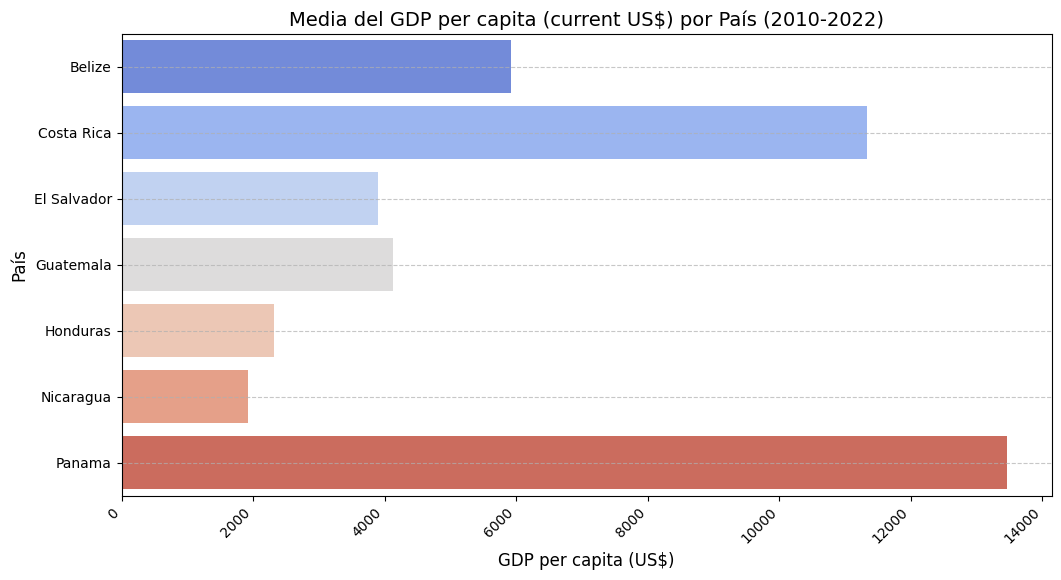

In [124]:
dfGPD_media = dfGPD.groupby('País').mean().mean(axis=1)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.barplot(y=dfGPD_media.index, x=dfGPD_media.values, palette='coolwarm')

plt.title('Media del GDP per capita (current US$) por País (2010-2022)', fontsize=14)
plt.ylabel('País', fontsize=12)
plt.xlabel('GDP per capita (US$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.show()

-Indicador: Industry (including construction), value added (% of GDP)

Se refiere al poncentaje del PIB que aporta el ramo de la industria en general y la construcción a un país

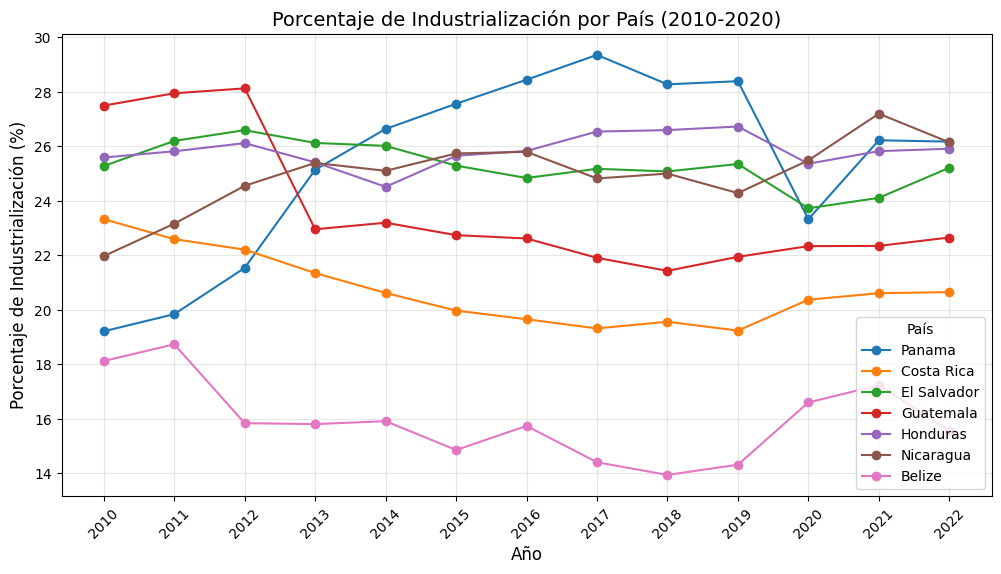

In [ ]:
# Filtrar por un indicador específico
dfIndustry = df[df['Indicador'] == "Industry (including construction), value added (% of GDP)"]

# Convertir columnas a numérico y calcular la media por país
dfIndustry.iloc[:, 2:] = dfIndustry.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
# eliminar la columna indicador
dfIndustry = dfIndustry.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfIndustry.set_index('País', inplace=True)
#dfIndustry

plt.figure(figsize=(12, 6))

for pais in dfIndustry.index:
    plt.plot(dfIndustry.columns, dfIndustry.loc[pais], marker='o', label=pais)

plt.title('Porcentaje de Industrialización por País (2010-2022)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de Industrialización (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(alpha=0.3)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_23024\1206187062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dfIndustry_media.index, x=dfIndustry_media.values, palette='coolwarm')


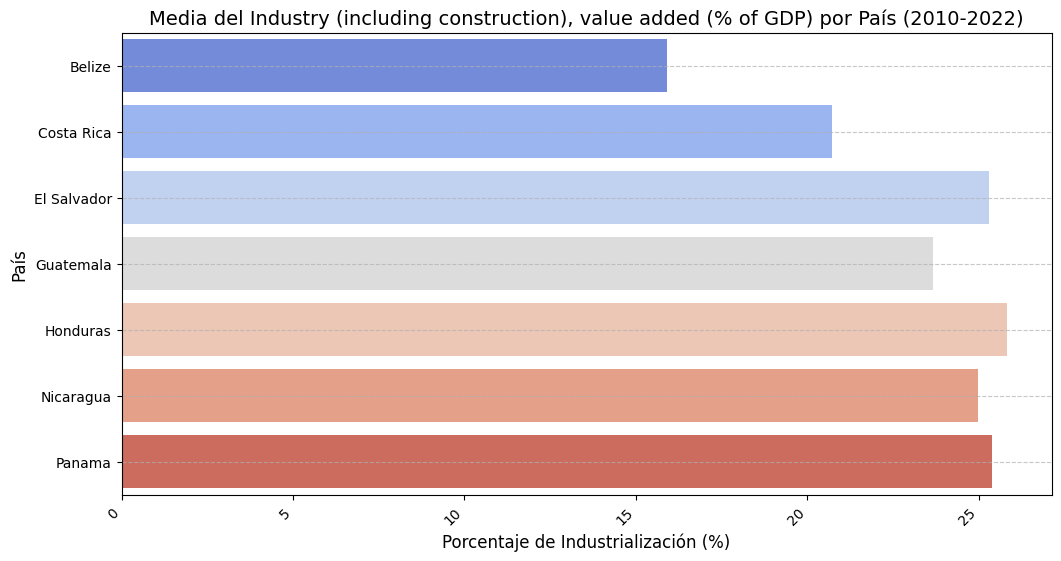

In [127]:
dfIndustry_media = dfIndustry.groupby('País').mean().mean(axis=1)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.barplot(y=dfIndustry_media.index, x=dfIndustry_media.values, palette='coolwarm')

plt.title('Media del Industry (including construction), value added (% of GDP) por País (2010-2022)', fontsize=14)
plt.ylabel('País', fontsize=12)
plt.xlabel('Porcentaje de Industrialización (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Maria Jose
- Labor force with advanced education 

In [55]:
# seleccione las filas que contienen el indicador "Labor force" 
dfLaborForce = df[df['Indicador'].str.contains('Labor force with advanced education', na=False)] 
# eliminar la columna indicador
dfLaborForce = dfLaborForce.drop(columns=['Indicador'])
# elegimos la columna " País" como index y eliminamos la columna "País"
dfLaborForce.set_index('País', inplace=True)
# mostramos los datos 
dfLaborForce 

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,83.935,83.58,83.564,83.183,82.407,84.264,82.129,82.283,83.466,84.929,80.542,79.377,79.159
Costa Rica,75.15,74.622,78.479,80.228,78.805,78.935,75.476,75.64,75.777,79.726,77.809,77.789,74.54
El Salvador,88.485,86.659,86.049,88.687,87.390,84.195,84.345,82.344,85.487,82.694,80.301,84.883,83.6
Guatemala,87.561,85.821,87.251,85.845,79.639,85.211,82.561,82.1,81.981,81.434,..,84.594,81.226
Honduras,89.467,87.715,83.379,88.862,86.198,85.718,86.74,83.604,86.308,83.443,..,84.298,76.802
Nicaragua,..,..,89.965,..,85.640,..,..,..,..,..,..,..,..
Belize,..,..,87.710,83.753,85.712,85.64,84.545,82.79,..,85.427,..,..,..


In [56]:
# Reemplazar los valores no numéricos por NaN
dfLaborForce.replace('..', pd.NA, inplace=True)

# Convertir las columnas a float, ignorando los errores
dfLaborForce = dfLaborForce.apply(pd.to_numeric, errors='coerce')
dfLaborForce

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,83.935,83.580,83.564,83.183,82.407,84.264,82.129,82.283,83.466,84.929,80.542,79.377,79.159
Costa Rica,75.150,74.622,78.479,80.228,78.805,78.935,75.476,75.640,75.777,79.726,77.809,77.789,74.540
El Salvador,88.485,86.659,86.049,88.687,87.390,84.195,84.345,82.344,85.487,82.694,80.301,84.883,83.600
Guatemala,87.561,85.821,87.251,85.845,79.639,85.211,82.561,82.100,81.981,81.434,NaN,84.594,81.226
Honduras,89.467,87.715,83.379,88.862,86.198,85.718,86.740,83.604,86.308,83.443,NaN,84.298,76.802
Nicaragua,NaN,NaN,89.965,NaN,85.640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belize,NaN,NaN,87.710,83.753,85.712,85.640,84.545,82.790,NaN,85.427,NaN,NaN,NaN


In [57]:
#cambiar filas por columnas de un dataframe
dfLaborForce.T

País,Panama,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Belize
2010,83.935,75.150,88.485,87.561,89.467,NaN,NaN
2011,83.580,74.622,86.659,85.821,87.715,NaN,NaN
2012,83.564,78.479,86.049,87.251,83.379,89.965,87.710
2013,83.183,80.228,88.687,85.845,88.862,NaN,83.753
2014,82.407,78.805,87.390,79.639,86.198,85.640,85.712
2015,84.264,78.935,84.195,85.211,85.718,NaN,85.640
2016,82.129,75.476,84.345,82.561,86.740,NaN,84.545
2017,82.283,75.640,82.344,82.100,83.604,NaN,82.790
2018,83.466,75.777,85.487,81.981,86.308,NaN,NaN
2019,84.929,79.726,82.694,81.434,83.443,NaN,85.427


<Axes: title={'center': 'Mean Labor force with advanced education '}, xlabel='País', ylabel='Labor force with advanced education Mean'>

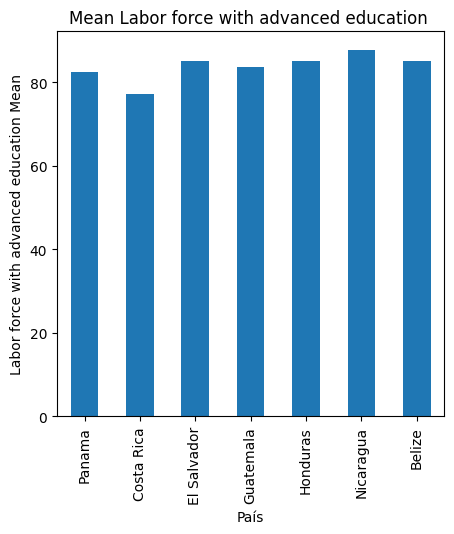

In [58]:
import matplotlib.pyplot as plt
dfLaborForceMean = dfLaborForce.T.mean() #cambiamos filas por columnas y calculamos la media de cada país
#grafico de barras
dfLaborForceMean.plot(kind='bar', title='Mean Labor force with advanced education ', figsize=(5,5), xlabel='País', ylabel='Labor force with advanced education Mean')

- Labor force, total

In [59]:
# seleccionar las filas que contienen el indicador "Labor force, total"
dfLaborForceTotal = df[df['Indicador'].str.contains('Labor force, total', na=False)]

# eliminar la columna indicador
dfLaborForceTotal = dfLaborForceTotal.drop(columns=['Indicador'])

# elegimos la columna "País" como index y eliminamos la columna "País"
dfLaborForceTotal.set_index('País', inplace=True)

# mostramos los datos
dfLaborForceTotal

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,1618269,1611450,1689370.0,1744928,1778532.0,1813736,1859078,1885561,1966334,2041466,1929211,1996749,2049663
Costa Rica,2060686,2149242,2321866.0,2337155,2395003.0,2380187,2296246,2335223,2459739,2573190,2456537,2529009,2542517
El Salvador,2494725,2517133,2579866.0,2630753,2617260.0,2618193,2673318,2687119,2694155,2762085,2632889,2768977,2835063
Guatemala,5253574,5486770,5980602.0,5682211,5883588.0,6022488,6184488,6364813,6472399,6481136,6460734,6764382,7069008
Honduras,3260247,3243536,3268694.0,3613486,3810624.0,3919626,3983810,4161688,4431793,4399023,4206572,4452659,4564937
Nicaragua,2442683,2512841,2583025.0,2652874,2722579.0,2784302,2845599,2907286,2954104,2999937,3024864,3085985,3189118
Belize,128753,133836,138977.0,144234,151065.0,156821,162580,166748,170728,174493,172620,177472,185068


In [60]:
# Reemplazar los valores no numéricos por NaN
dfLaborForceTotal.replace('..', pd.NA, inplace=True)

# Convertir los datos a tipo float
dfLaborForceTotal = dfLaborForceTotal.apply(pd.to_numeric, errors='coerce')

# Mostrar los datos
dfLaborForceTotal

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,1618269,1611450,1689370.0,1744928,1778532.0,1813736,1859078,1885561,1966334,2041466,1929211,1996749,2049663
Costa Rica,2060686,2149242,2321866.0,2337155,2395003.0,2380187,2296246,2335223,2459739,2573190,2456537,2529009,2542517
El Salvador,2494725,2517133,2579866.0,2630753,2617260.0,2618193,2673318,2687119,2694155,2762085,2632889,2768977,2835063
Guatemala,5253574,5486770,5980602.0,5682211,5883588.0,6022488,6184488,6364813,6472399,6481136,6460734,6764382,7069008
Honduras,3260247,3243536,3268694.0,3613486,3810624.0,3919626,3983810,4161688,4431793,4399023,4206572,4452659,4564937
Nicaragua,2442683,2512841,2583025.0,2652874,2722579.0,2784302,2845599,2907286,2954104,2999937,3024864,3085985,3189118
Belize,128753,133836,138977.0,144234,151065.0,156821,162580,166748,170728,174493,172620,177472,185068


In [61]:
#cambiar filas por columnas de un dataframe
dfLaborForceTotal.T

País,Panama,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Belize
2010,1618269.0,2060686.0,2494725.0,5253574.0,3260247.0,2442683.0,128753.0
2011,1611450.0,2149242.0,2517133.0,5486770.0,3243536.0,2512841.0,133836.0
2012,1689370.0,2321866.0,2579866.0,5980602.0,3268694.0,2583025.0,138977.0
2013,1744928.0,2337155.0,2630753.0,5682211.0,3613486.0,2652874.0,144234.0
2014,1778532.0,2395003.0,2617260.0,5883588.0,3810624.0,2722579.0,151065.0
2015,1813736.0,2380187.0,2618193.0,6022488.0,3919626.0,2784302.0,156821.0
2016,1859078.0,2296246.0,2673318.0,6184488.0,3983810.0,2845599.0,162580.0
2017,1885561.0,2335223.0,2687119.0,6364813.0,4161688.0,2907286.0,166748.0
2018,1966334.0,2459739.0,2694155.0,6472399.0,4431793.0,2954104.0,170728.0
2019,2041466.0,2573190.0,2762085.0,6481136.0,4399023.0,2999937.0,174493.0


<Axes: title={'center': 'Mean Labor force Total '}, xlabel='País', ylabel='Labor force Total Mean'>

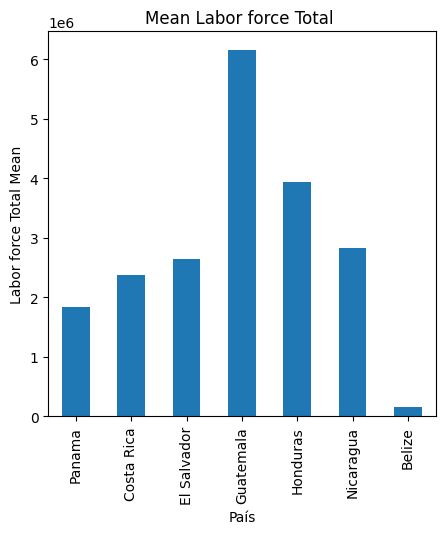

In [62]:
import matplotlib.pyplot as plt
dfLaborForceTotalMean = dfLaborForceTotal.T.mean() #cambiamos filas por columnas y calculamos la media de cada país
#grafico de barras
dfLaborForceTotalMean.plot(kind='bar', title='Mean Labor force Total ', figsize=(5,5), xlabel='País', ylabel='Labor force Total Mean')

- Life expectancy at birth, total

In [63]:
# seleccionar las filas que contienen el indicador "Life expectancy at birth, total (years)"
dfLifeExpectancy = df[df['Indicador'].str.contains('Life expectancy at birth, total (years)', na=False, regex=False)]


# eliminar la columna indicador
dfLifeExpectancy = dfLifeExpectancy.drop(columns=['Indicador'])

# elegimos la columna "País" como index y eliminamos la columna "País"
dfLifeExpectancy.set_index('País', inplace=True)

# mostrar los datos
dfLifeExpectancy

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,76.448,76.627,76.819,77.038,77.248,77.468,77.653,77.795,77.863,77.81,76.657,76.223,76.826
Costa Rica,78.67,79.348,79.283,79.403,78.774,79.086,79.459,79.377,79.484,79.427,79.277,77.023,77.32
El Salvador,71.848,71.859,71.831,71.771,71.746,71.814,72.025,72.311,72.555,72.559,71.061,70.748,71.475
Guatemala,70.878,71.177,71.463,71.728,71.964,72.103,72.355,72.551,72.726,73.129,71.797,69.237,68.674
Honduras,71.088,71.439,71.734,71.963,72.259,72.487,72.588,72.692,72.814,72.881,71.462,70.123,70.728
Nicaragua,72.009,72.416,72.615,72.704,72.812,72.983,73.256,73.554,73.85,74.054,71.795,73.837,74.615
Belize,72.272,72.651,73.245,73.666,73.311,73.187,73.399,73.562,73.703,73.931,72.854,70.47,70.962


In [64]:
# Reemplazar los valores no numéricos por NaN
dfLifeExpectancy.replace('..', pd.NA, inplace=True)

# Convertir los datos a tipo float
dfLifeExpectancy = dfLifeExpectancy.apply(pd.to_numeric, errors='coerce')

# Mostrar los datos
dfLifeExpectancy

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,76.448,76.627,76.819,77.038,77.248,77.468,77.653,77.795,77.863,77.810,76.657,76.223,76.826
Costa Rica,78.670,79.348,79.283,79.403,78.774,79.086,79.459,79.377,79.484,79.427,79.277,77.023,77.320
El Salvador,71.848,71.859,71.831,71.771,71.746,71.814,72.025,72.311,72.555,72.559,71.061,70.748,71.475
Guatemala,70.878,71.177,71.463,71.728,71.964,72.103,72.355,72.551,72.726,73.129,71.797,69.237,68.674
Honduras,71.088,71.439,71.734,71.963,72.259,72.487,72.588,72.692,72.814,72.881,71.462,70.123,70.728
Nicaragua,72.009,72.416,72.615,72.704,72.812,72.983,73.256,73.554,73.850,74.054,71.795,73.837,74.615
Belize,72.272,72.651,73.245,73.666,73.311,73.187,73.399,73.562,73.703,73.931,72.854,70.470,70.962


In [65]:
#cambiar filas por columnas de un dataframe
dfLifeExpectancy.T

País,Panama,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Belize
2010,76.448,78.670,71.848,70.878,71.088,72.009,72.272
2011,76.627,79.348,71.859,71.177,71.439,72.416,72.651
2012,76.819,79.283,71.831,71.463,71.734,72.615,73.245
2013,77.038,79.403,71.771,71.728,71.963,72.704,73.666
2014,77.248,78.774,71.746,71.964,72.259,72.812,73.311
2015,77.468,79.086,71.814,72.103,72.487,72.983,73.187
2016,77.653,79.459,72.025,72.355,72.588,73.256,73.399
2017,77.795,79.377,72.311,72.551,72.692,73.554,73.562
2018,77.863,79.484,72.555,72.726,72.814,73.850,73.703
2019,77.810,79.427,72.559,73.129,72.881,74.054,73.931


<Axes: title={'center': 'Mean Life expectancy at birth, total  '}, xlabel='País', ylabel='Life expectancy at birth, total  Mean'>

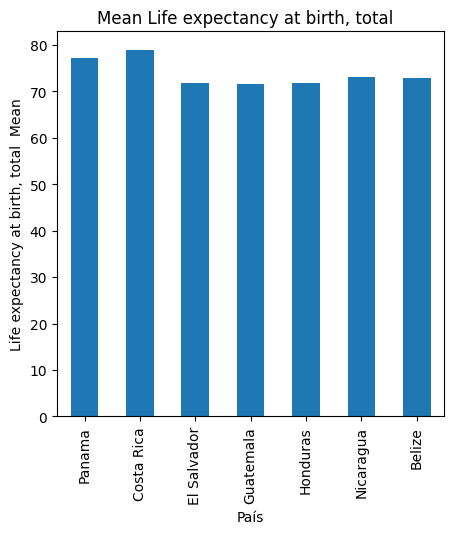

In [66]:
import matplotlib.pyplot as plt
dfLifeExpectancyMean = dfLifeExpectancy.T.mean() #cambiamos filas por columnas y calculamos la media de cada país
#grafico de barras
dfLifeExpectancyMean.plot(kind='bar', title='Mean Life expectancy at birth, total  ', figsize=(5,5), xlabel='País', ylabel='Life expectancy at birth, total  Mean')

### Karen
- Indicador: 'Net migration'

In [67]:
# seleccionar las filas que contienen el indicador "Net migration"
dfNetMigration = df[df['Indicador'].str.contains('Net migration')]
# eliminar la columna indicador
dfNetMigration = dfNetMigration.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfNetMigration.set_index('País', inplace=True)
# mostramos los datos
dfNetMigration

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,4953,5167,5447.0,5926,7105.0,8648,10109,11059,11130,10623,5473,5473,7967
Costa Rica,4728,4258,3983.0,3950,3996.0,4065,4150,4196,4198,4154,2084,2084,3850
El Salvador,-54686,-53440,-50554.0,-49086,-49130.0,-51282,-47499,-50616,-54158,-55143,-25214,-27343,-23249
Guatemala,-36072,-33204,-32572.0,-35666,-40409.0,-48162,-39266,-48049,-56884,-58095,-23142,-29118,-9128
Honduras,-5418,-5664,-5896.0,-6094,-6302.0,-6512,-6685,-6782,-6768,-6550,-6199,-5779,-5374
Nicaragua,-29081,-28224,-27388.0,-26589,-25571.0,-24359,-23081,-21841,-20739,-19733,-10384,-10384,-8000
Belize,1644,1583,1529.0,1504,1452.0,1363,1283,1222,1185,1164,0,577,600


In [68]:
#convertir los datos de tipo objeto a tipo float
dfNetMigration = dfNetMigration.astype(float)
dfNetMigration

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,4953.0,5167.0,5447.0,5926.0,7105.0,8648.0,10109.0,11059.0,11130.0,10623.0,5473.0,5473.0,7967.0
Costa Rica,4728.0,4258.0,3983.0,3950.0,3996.0,4065.0,4150.0,4196.0,4198.0,4154.0,2084.0,2084.0,3850.0
El Salvador,-54686.0,-53440.0,-50554.0,-49086.0,-49130.0,-51282.0,-47499.0,-50616.0,-54158.0,-55143.0,-25214.0,-27343.0,-23249.0
Guatemala,-36072.0,-33204.0,-32572.0,-35666.0,-40409.0,-48162.0,-39266.0,-48049.0,-56884.0,-58095.0,-23142.0,-29118.0,-9128.0
Honduras,-5418.0,-5664.0,-5896.0,-6094.0,-6302.0,-6512.0,-6685.0,-6782.0,-6768.0,-6550.0,-6199.0,-5779.0,-5374.0
Nicaragua,-29081.0,-28224.0,-27388.0,-26589.0,-25571.0,-24359.0,-23081.0,-21841.0,-20739.0,-19733.0,-10384.0,-10384.0,-8000.0
Belize,1644.0,1583.0,1529.0,1504.0,1452.0,1363.0,1283.0,1222.0,1185.0,1164.0,0.0,577.0,600.0


In [69]:
#cambiar filas por columnas de un dataframe
dfNetMigration.T

País,Panama,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Belize
2010,4953.0,4728.0,-54686.0,-36072.0,-5418.0,-29081.0,1644.0
2011,5167.0,4258.0,-53440.0,-33204.0,-5664.0,-28224.0,1583.0
2012,5447.0,3983.0,-50554.0,-32572.0,-5896.0,-27388.0,1529.0
2013,5926.0,3950.0,-49086.0,-35666.0,-6094.0,-26589.0,1504.0
2014,7105.0,3996.0,-49130.0,-40409.0,-6302.0,-25571.0,1452.0
2015,8648.0,4065.0,-51282.0,-48162.0,-6512.0,-24359.0,1363.0
2016,10109.0,4150.0,-47499.0,-39266.0,-6685.0,-23081.0,1283.0
2017,11059.0,4196.0,-50616.0,-48049.0,-6782.0,-21841.0,1222.0
2018,11130.0,4198.0,-54158.0,-56884.0,-6768.0,-20739.0,1185.0
2019,10623.0,4154.0,-55143.0,-58095.0,-6550.0,-19733.0,1164.0


<Axes: title={'center': 'Mean Net Migration'}, xlabel='País', ylabel='Net Migration Mean'>

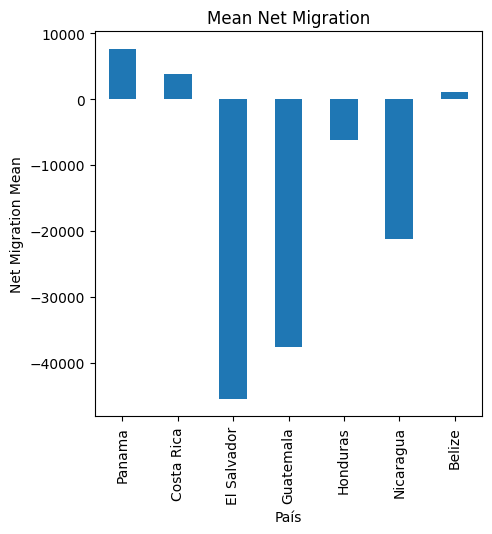

In [70]:
import matplotlib.pyplot as plt
dfNetMigMean = dfNetMigration.T.mean() #cambiamos filas por columnas y calculamos la media de cada país
#grafico de barras
dfNetMigMean.plot(kind='bar', title='Mean Net Migration', figsize=(5,5), xlabel='País', ylabel='Net Migration Mean')

<Axes: >

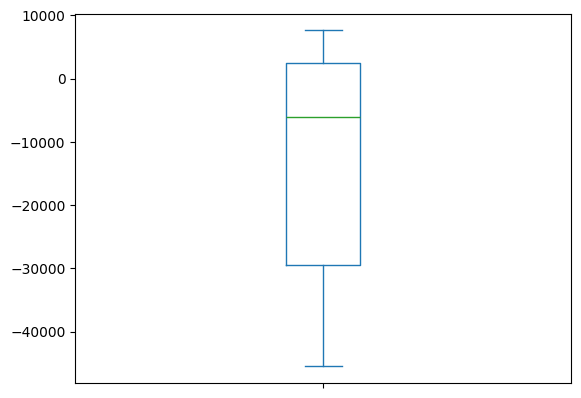

In [71]:
#grafico de caja
dfNetMigMean.plot(kind='box') 

<Axes: ylabel='Frequency'>

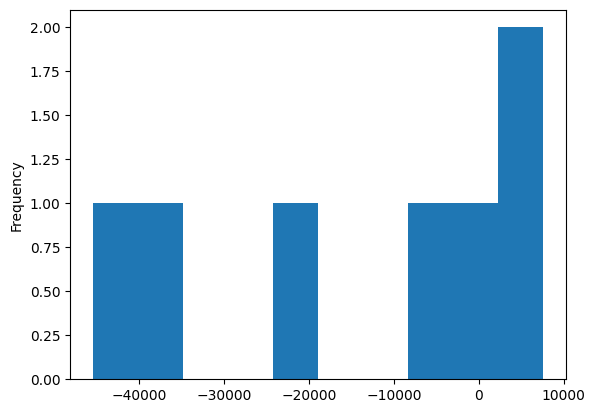

In [72]:
#Histograma
dfNetMigMean.plot(kind='hist') 

- 	'People using at least basic sanitation services (% of population)'

- 'Population density (people per sq. km of land area)'